This is not a Solution, Worked on Class Hours!

In [2]:
%matplotlib inline


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import model_selection
from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


In [4]:
df = pd.read_csv("Bank_Personal_Loan_Modelling_kaggle.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [5]:
df.shape

(5000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
  df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [10]:
#from df.describe() we got to see "experience" has negative! typing error!

#dataframe.abs() is one of the simplest pandas dataframe function.
# It returns an object with absolute value taken and it is only applicable to objects that are all numeric.

df['Experience'] = df['Experience'].abs()

df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Features(attributes) Understanding from the above dataframe :-

The ID variable can be ignored as it will not any effect on our model. As we know customer Id is just to maitain the record in serial order. There is no relationship with Id and Loan.
Target Variable is Personal Loan which describe whether the person has taken loan or not. This is the variable which we need to predict.

Nonimal Varibles :

ID - Customer ID
ZIP Code - Home Address ZIP code of the customer. This variable can also be ignored becasue we can not judge the customers based on thier area or location.
Ordinal Categorical variables :

Family - Number of famlily member of the customer
Education - Education level of the customer. In our dataset it ranges from 1 to 3 which are Under Graduate, Graduate and Post Graduate respectivly.

Interval Variables :

Age - Age of the customer
Experience - Years of experience of customer has
Income - Annula Income of the customer which is in dollars
CCAvg - Avg. spending on credit cards per month which in dollars.
Mortgage - Value of House Mortgage

Binary Categorical Variable :

CD Account - Does the customer have CD Account with bank or not?
Security Account - Does the customer have Security Account with bank or not?
Online - Does the customer have Online banking facility with bank or not?
Credit Card - Does the customer have a credit card issued by Universal Bank or not?
Personal Loan - This our target variable which we have to predict. This indicates that the customer has token loan or not?

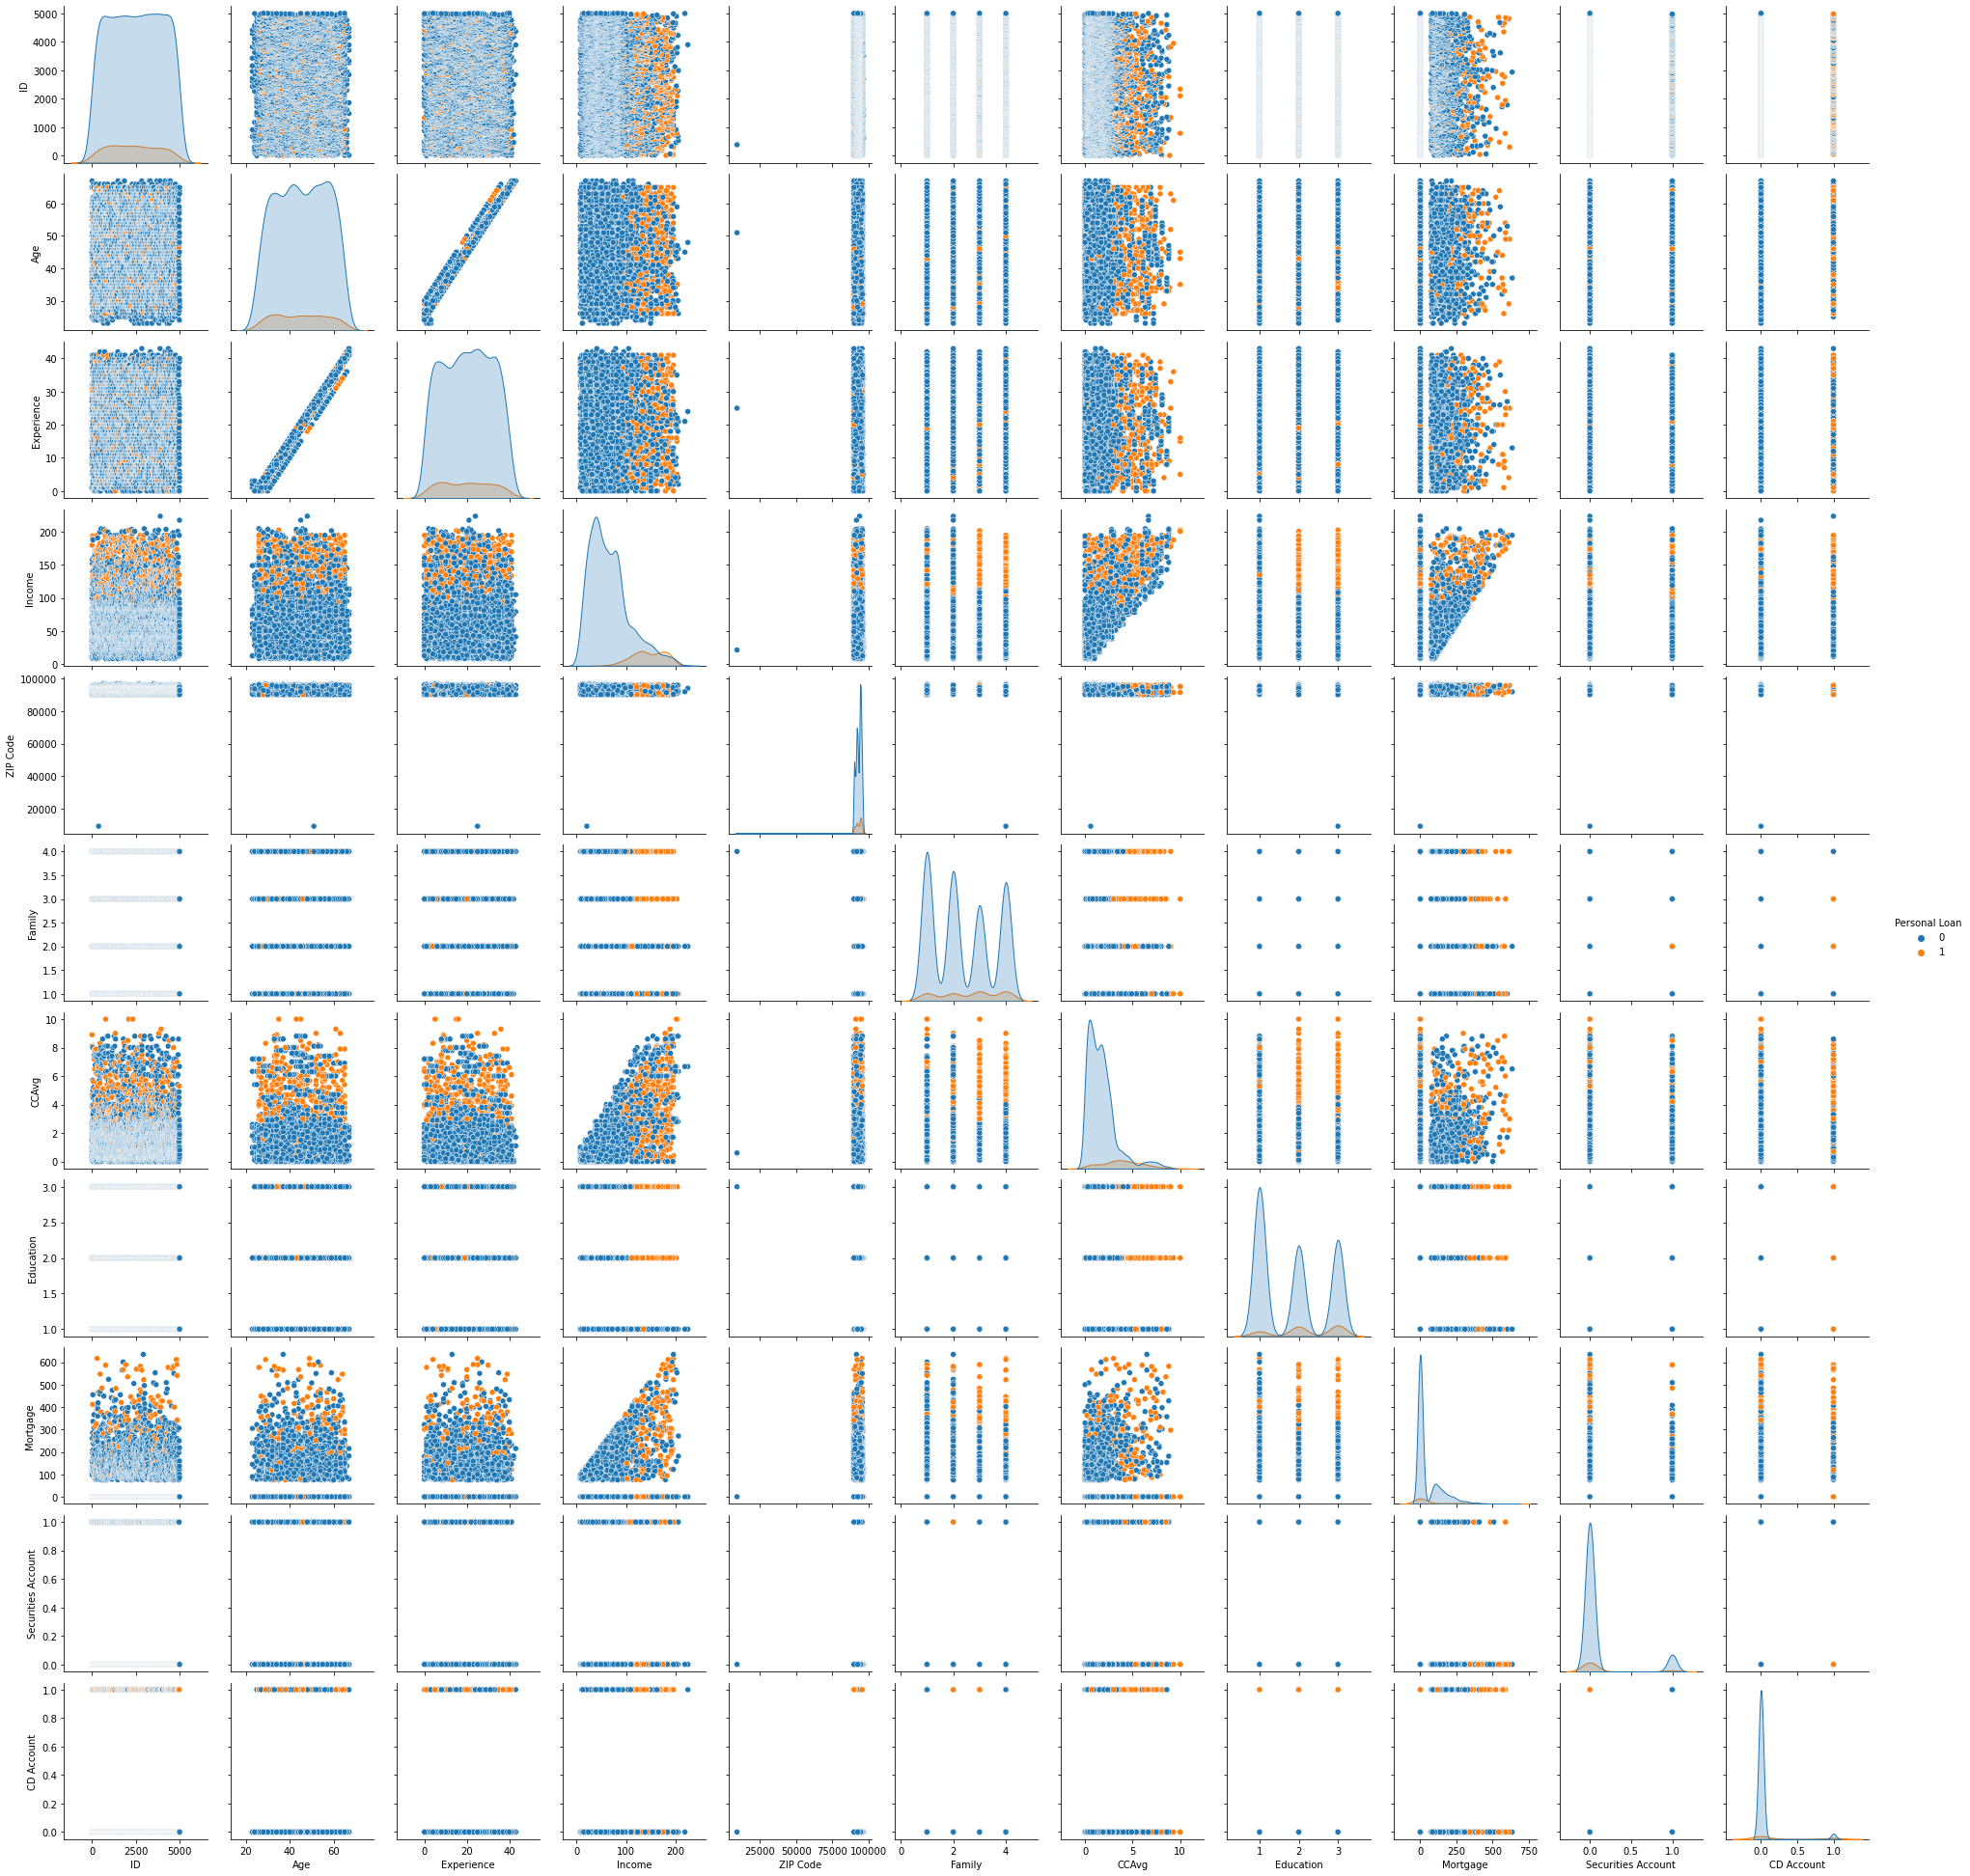

In [12]:
#importing seaborn 

import seaborn as sns
df_attr = df.iloc[:,0:12]

sns.pairplot(df_attr, diag_kind='kde', hue='Personal Loan')

In [15]:
  # No of records in two different classes:
df.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [ ]:
#from above it is clear 0: did not take loans
# and 1:took loans


In [16]:
df = df.drop('ID', axis=1)

In [18]:
df = df.drop('ZIP Code', axis=1)

In [19]:
#Seperate the independent variables i.e Columns 0 to 8 and store it in 'X'
#Store the target column in 'Y'

X_df = df.iloc[:, df.columns != 'Personal Loan']
y_df = df.iloc[:, df.columns == 'Personal Loan']


In [ ]:
##<--------------------------Logistic Regression Model------------------------> 

In [ ]:
#Creating data training and test data in the ratio 70:30.

In [23]:
features = X_df.iloc[:, 0:10]
features_array = features.values   #Logistic modelling requires feature array not the dataframe df
target_labels = y_df.values


test_size = 0.40  #taking 60:40 training and test set

seed = 7          #Random number seeding for repeatability of the code when using random functions to generate training and test data.


In [24]:
#Generating the training and test data.

X_train, X_test, y_train, y_test = model_selection.train_test_split(features_array, target_labels)
y_train = np.ravel(y_train)  #to convert 1-d vector into 1-d array



In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
y_predict = model.predict(X_test)

print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))



0.9448
[[1109   17]
 [  52   72]]


C:\Users\Shreyas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
